> # **Mental health prediction EDA(Exploratory Data Analysis) and ML Models**
---


> # **1. Import Libraries**

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

> # **2. Data Preprocessing** 

In [351]:
#Print the dataframe
#Dataset link : "https://www.kaggle.com/datasets/ron2112/mental-health-data"
url = r'/content/drive/MyDrive/ML Innovative/Mental Health Data.csv'
data=pd.read_csv(url)
data.head(10)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,1 to 5,1.0,NaN,Yes,Yes,No,No,Somewhat difficult,Maybe,...,Sometimes,Often,33,Male,Canada,NaN,Canada,NaN,Back-end Developer,Sometimes
1,0,1 to 5,1.0,NaN,No,No,No,I don't know,Very easy,Yes,...,Not applicable to me,Not applicable to me,40,male,Netherlands,NaN,Netherlands,NaN,Front-end Developer|Back-end Developer,Sometimes
2,0,1 to 5,1.0,NaN,Yes,Yes,No,I don't know,I don't know,Maybe,...,Not applicable to me,Not applicable to me,21,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer|DevOps/SysAdmin,Never
3,0,1 to 5,1.0,NaN,No,No,No,No,Very difficult,No,...,Often,Often,36,Male,Brazil,NaN,Brazil,NaN,Back-end Developer,Never
4,0,1 to 5,0.0,1.0,I don't know,No,Yes,No,Very difficult,Yes,...,Not applicable to me,Often,36,F,United States of America,Indiana,United States of America,Indiana,Other,Sometimes
5,0,1 to 5,1.0,NaN,No,Yes,No,No,Very difficult,No,...,Sometimes,Often,42,"Transitioned, M2F",Canada,NaN,Canada,NaN,Executive Leadership|Supervisor/Team Lead|Dev ...,Always
6,0,1 to 5,1.0,NaN,Not eligible for coverage / N/A,NaN,Yes,I don't know,Very easy,Yes,...,Never,Often,26,Other/Transfeminine,Netherlands,NaN,Netherlands,NaN,Executive Leadership|DevOps/SysAdmin|Back-end ...,Sometimes
7,0,1 to 5,1.0,NaN,No,No,No,No,Somewhat easy,Maybe,...,Not applicable to me,Not applicable to me,29,M,Denmark,NaN,Denmark,NaN,Back-end Developer|DevOps/SysAdmin,Sometimes
8,0,1 to 5,1.0,NaN,Yes,No,No,No,Somewhat easy,Yes,...,Rarely,Sometimes,30,female,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead|Back-end Developer|Front-...,Sometimes
9,0,1 to 5,0.0,1.0,No,Yes,Yes,No,Somewhat easy,Yes,...,Never,Sometimes,36,Male,Mexico,NaN,Mexico,NaN,DevOps/SysAdmin|Executive Leadership,Sometimes


In [352]:
# Information of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 31 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                  --------------  -----  
 0   Are you self-employed?                                                                                                                  1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                              1146 non-null   object 
 2   Is your employer primarily a tech company/organization?                                                                                 1146 non-null   float64
 3   Is your primary role within your company related to tech/IT?   

In [353]:
#Check the Shape of dataset
print(data.shape)

(1433, 31)


In [354]:
#Make the list of columns
a=list(data.columns)
print(a)
# New name of the all columns
b=['self_employed',
   'no_of_employees',
   'tech_company','role_IT',
   'mental_healthcare_coverage',
   'knowledge_about_mental_healthcare_options_workplace',
   'employer_discussed_mental_health ',
   'employer_offer_resources_to_learn_about_mental_health',
   'medical_leave_from_work ',
  'comfortable_discussing_with_coworkers',
   'employer_take_mental_health_seriously',
   'knowledge_of_local_online_resources ',
   'productivity_affected_by_mental_health ',
   'percentage_work_time_affected_mental_health',
   'openess_of_family_friends',
  'family_history_mental_illness',
   'mental_health_disorder_past',
   'currently_mental_health_disorder',
   'diagnosed_mental_health_condition',
   'type_of_disorder',
   'treatment_from_professional',
   'while_effective_treatment_mental_health_issue_interferes_work',
   'while_not_effective_treatment_interferes_work ',
   'age',
   'gender',
   'country',
   'US state',
  'country work ',
   'US state work',
   'role_in_company',
   'work_remotely','']
for i,j in zip(a,b):
    data.rename(columns={i:j},inplace=True)

['Are you self-employed?', 'How many employees does your company or organization have?', 'Is your employer primarily a tech company/organization?', 'Is your primary role within your company related to tech/IT?', 'Does your employer provide mental health benefits as part of healthcare coverage?', 'Do you know the options for mental health care available under your employer-provided coverage?', 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?', 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:', 'Would you feel comfortable discussing a mental health disorder with your coworkers?', 'Do you feel that your employer takes mental health as seriously as physical health?', 'Do you know local or online resources to seek help for a mental healt

In [355]:
# Information of dataframe after the rename
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 31 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   self_employed                                                  1433 non-null   int64  
 1   no_of_employees                                                1146 non-null   object 
 2   tech_company                                                   1146 non-null   float64
 3   role_IT                                                        263 non-null    float64
 4   mental_healthcare_coverage                                     1146 non-null   object 
 5   knowledge_about_mental_healthcare_options_workplace            1013 non-null   object 
 6   employer_discussed_mental_health                               1146 non-null   object 
 7   employer_offer_resources_to_learn_about_mental_health       

In [356]:
## Now We Find the Missing values in different Columns
columns=data.columns
pd.DataFrame({'no of missing values':data.isnull().sum()})

,no of missing values
self_employed,0
no_of_employees,287
tech_company,287
role_IT,1170
mental_healthcare_coverage,287
knowledge_about_mental_healthcare_options_workplace,420
employer_discussed_mental_health,287
employer_offer_resources_to_learn_about_mental_health,287
medical_leave_from_work,287
comfortable_discussing_with_coworkers,287


In [357]:
# Now we copy the dataset in data1
data1=data.copy()
data1

,self_employed,no_of_employees,tech_company,role_IT,mental_healthcare_coverage,knowledge_about_mental_healthcare_options_workplace,employer_discussed_mental_health,employer_offer_resources_to_learn_about_mental_health,medical_leave_from_work,comfortable_discussing_with_coworkers,...,while_effective_treatment_mental_health_issue_interferes_work,while_not_effective_treatment_interferes_work,age,gender,country,US state,country work,US state work,role_in_company,work_remotely
0,0,1 to 5,1.0,NaN,Yes,Yes,No,No,Somewhat difficult,Maybe,...,Sometimes,Often,33,Male,Canada,NaN,Canada,NaN,Back-end Developer,Sometimes
1,0,1 to 5,1.0,NaN,No,No,No,I don't know,Very easy,Yes,...,Not applicable to me,Not applicable to me,40,male,Netherlands,NaN,Netherlands,NaN,Front-end Developer|Back-end Developer,Sometimes
2,0,1 to 5,1.0,NaN,Yes,Yes,No,I don't know,I don't know,Maybe,...,Not applicable to me,Not applicable to me,21,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer|DevOps/SysAdmin,Never
3,0,1 to 5,1.0,NaN,No,No,No,No,Very difficult,No,...,Often,Often,36,Male,Brazil,NaN,Brazil,NaN,Back-end Developer,Never
4,0,1 to 5,0.0,1.0,I don't know,No,Yes,No,Very difficult,Yes,...,Not applicable to me,Often,36,F,United States of America,Indiana,United States of America,Indiana,Other,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Often,Often,29,Male,Canada,NaN,Canada,NaN,One-person shop|Designer|Front-end Developer|B...,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,m,Germany,NaN,Germany,NaN,One-person shop,Sometimes
1430,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,29,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer|DevOps/SysAdmin|Supervisor/...,Always
1431,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes


In [358]:
# Now there are sum columns which has so many tuple are not have any value so it is unnecessary columns for us so we can remove it using  drop. 
remove_columns = ['role_IT',
                  'knowledge_of_local_online_resources ',
        'productivity_affected_by_mental_health ',
        'percentage_work_time_affected_mental_health']
data2=data1.drop(remove_columns,axis=1)
data2.shape

(1433, 27)

> # **Cleaning Different Columns**

In [359]:
# No of employee column
print(data2.no_of_employees.unique())
data2.no_of_employees.unique()

['1 to 5' '6 to 25' '26-99' '100-500' '26-100' '500-1000' 'More than 1000'
 nan]


array(['1 to 5', '6 to 25', '26-99', '100-500', '26-100', '500-1000',
       'More than 1000', nan], dtype=object)

In [360]:
# change the value format
data2.no_of_employees.replace(to_replace=['1 to 5', '6 to 25','More than 1000','26-99'],
                                value=['1-5','6-25','>1000','26-100'],inplace=True)

print(data2.no_of_employees.value_counts())

26-100      326
>1000       256
100-500     248
6-25        176
500-1000     80
1-5          60
Name: no_of_employees, dtype: int64


In [361]:
# Cleaning Mental Health Care coverage column
data2.mental_healthcare_coverage.unique()

array(['Yes', 'No', "I don't know", 'Not eligible for coverage / N/A',
       nan], dtype=object)

In [362]:
data2.mental_healthcare_coverage.replace(to_replace=['Not eligible for coverage / N/A'],
                                value='No',inplace=True)
print(data2.mental_healthcare_coverage.unique())
print(data2.mental_healthcare_coverage.value_counts())

['Yes' 'No' "I don't know" nan]
Yes             531
I don't know    319
No              296
Name: mental_healthcare_coverage, dtype: int64


In [363]:
# openess_of_family_friends column
data2.openess_of_family_friends.unique()

array(['Somewhat open', 'Very open', 'Somewhat not open', 'Neutral',
       'Not applicable to me (I do not have a mental illness)',
       'Not open at all'], dtype=object)

In [364]:
data2.openess_of_family_friends.replace(to_replace=['Not applicable to me (I do not have a mental illness)'],
                                        value="I don't know",inplace=True)
data2.openess_of_family_friends.unique()

array(['Somewhat open', 'Very open', 'Somewhat not open', 'Neutral',
       "I don't know", 'Not open at all'], dtype=object)

In [365]:
print(data2.openess_of_family_friends.value_counts())

Somewhat open        640
Very open            251
Somewhat not open    214
Neutral              141
I don't know         112
Not open at all       75
Name: openess_of_family_friends, dtype: int64


In [366]:
# Cleaning the age column remove outliers
med_age = data2[(data2['age'] >= 18) | (data2['age'] <= 75)]['age'].median()
print(med_age)
data2['age'].replace(to_replace = data2[(data2['age'] < 18) | (data2['age'] > 75)]['age'].tolist(),
                          value = med_age, inplace = True)
data2.age.unique()

33.0


array([33., 40., 21., 36., 42., 26., 29., 30., 56., 35., 51., 24., 38.,
       44., 27., 55., 22., 25., 28., 23., 32., 31., 43., 37., 39., 45.,
       46., 20., 54., 34., 61., 41., 48., 66., 19., 52., 50., 49., 47.,
       57., 74., 53., 58., 70., 59., 62., 63., 65.])

In [367]:
# gender column
data2.gender.unique()

array(['Male', 'male', 'F', 'Transitioned, M2F', 'Other/Transfeminine',
       'M', 'female', 'm', 'Female', 'f', 'non-binary', 'woman', 'male ',
       'Male ', 'Bigender', 'Genderfluid (born female)',
       'male 9:1 female, roughly', 'Male (cis)', 'Other', 'Sex is male',
       'genderqueer', 'Human', 'mail', 'Cis-woman',
       'female-bodied; no feelings about gender', 'Transgender woman',
       'Genderfluid', 'female ', 'Male/genderqueer', 'fem', 'Nonbinary',
       ' Female', 'Female ', 'Genderqueer', nan, 'I identify as female.',
       'fm', 'Cis female ', 'female/woman', 'Androgynous', 'man',
       'nb masculine', 'Cisgender Female', 'Woman', 'Cis Male',
       'Female or Multi-Gender Femme', 'Male.', 'Enby', 'Agender',
       'Female (props for making this a freeform field, though)',
       'cis man', 'Female assigned at birth ', 'Cis male', 'Man',
       'none of your business', 'cis male', 'genderqueer woman', 'Queer',
       'Dude', 'Male (trans, FtM)', 'cisdude', 'Gen

In [368]:
data2['gender'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 'male', inplace = True)
data2['gender'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 'female', inplace = True)
data2['gender'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman'], value = 'other', inplace = True)

In [369]:
data2.gender.unique()

array(['male', 'female', 'other', nan], dtype=object)

In [370]:
data2.gender.value_counts()

male      1060
female     343
other       27
Name: gender, dtype: int64

In [371]:
## Cleaning the role_in_company
tech_list = []
tech_list.append(data2[data2['role_in_company'].str.contains('Back-end')]['role_in_company'].tolist())
tech_list.append(data2[data2['role_in_company'].str.contains('Front-end')]['role_in_company'].tolist())
tech_list.append(data2[data2['role_in_company'].str.contains('Dev')]['role_in_company'].tolist())
tech_list.append(data2[data2['role_in_company'].str.contains('DevOps')]['role_in_company'].tolist())
flat_list = [item for sublist in tech_list for item in sublist]
flat_list = list(dict.fromkeys(flat_list))

In [372]:
## Replace tech role=1 and other=0 in a new tech role operation
data2['tech_role']=data2['role_in_company']
data2['tech_role'].replace(to_replace=flat_list,value=1,inplace=True)
remain_list=data2['tech_role'].unique()[1:]
data2['tech_role'].replace(to_replace=remain_list,value=0,inplace=True)

In [373]:
data2.tech_role.value_counts()

1    1045
0     388
Name: tech_role, dtype: int64

In [374]:
data2=data2.drop(['role_in_company'],axis=1)

> # **Handling Missing values**

In [375]:
data3=pd.concat([data2['type_of_disorder'],data2['US state'],data2['US state work']],axis=1)
print(data3.info())
data2=data2.drop(['type_of_disorder','US state','US state work'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type_of_disorder  711 non-null    object
 1   US state          840 non-null    object
 2   US state work     851 non-null    object
dtypes: object(3)
memory usage: 33.7+ KB
None


In [376]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 24 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   self_employed                                                  1433 non-null   int64  
 1   no_of_employees                                                1146 non-null   object 
 2   tech_company                                                   1146 non-null   float64
 3   mental_healthcare_coverage                                     1146 non-null   object 
 4   knowledge_about_mental_healthcare_options_workplace            1013 non-null   object 
 5   employer_discussed_mental_health                               1146 non-null   object 
 6   employer_offer_resources_to_learn_about_mental_health          1146 non-null   object 
 7   medical_leave_from_work                                     

In [377]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(data2)
imp_data=pd.DataFrame(data=imp.transform(data2),columns=data2.columns)

In [378]:
data4=pd.concat([imp_data,data3],axis=1)
data4.isnull().sum().to_frame()

,0
self_employed,0
no_of_employees,0
tech_company,0
mental_healthcare_coverage,0
knowledge_about_mental_healthcare_options_workplace,0
employer_discussed_mental_health,0
employer_offer_resources_to_learn_about_mental_health,0
medical_leave_from_work,0
comfortable_discussing_with_coworkers,0
employer_take_mental_health_seriously,0


> # **3. EDA(Exploratory Data Analysis)**

Questions with regard to the Target:

([<matplotlib.patches.Wedge at 0x7fd81da7e3d0>,
 [Text(-0.018092161764598828, 1.0998512052467295, 'No'),
  Text(0.01809216176459845, -1.0998512052467295, 'Yes')],
 [Text(-0.00986845187159936, 0.5999188392254888, '50.523561%'),
  Text(0.009868451871599154, -0.5999188392254888, '49.476439%')])

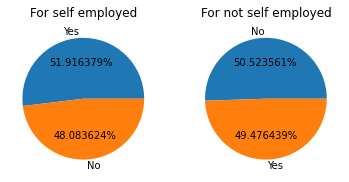

In [379]:
# 1. If a person is self employed then is there a higher chance of mental disorder?

plt.subplot(1,2,1)
plt.title("For self employed")
plt.pie(data4[data4.self_employed==1]['diagnosed_mental_health_condition'].value_counts(),autopct='%1f%%',radius=1,labels=data4[data4.self_employed==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("For not self employed")
plt.pie(data4[data4.self_employed==0]['diagnosed_mental_health_condition'].value_counts(),autopct='%1f%%',radius=1, labels=data4[data4.self_employed==0]['diagnosed_mental_health_condition'].value_counts().index)

Text(0.5, 1.0, 'Mental health in different size companies')

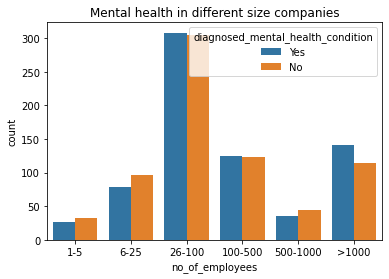

In [380]:
# 2. Does big size of the company affect your mental health condition adversely?
import seaborn as sns
sns.countplot(data=data4,x='no_of_employees',hue='diagnosed_mental_health_condition')
plt.title('Mental health in different size companies')

([<matplotlib.patches.Wedge at 0x7fd81d927890>,
 [Text(-0.019708651065785975, 1.0998234263158642, 'Yes'),
  Text(0.019708754038686934, -1.0998234244706022, 'No')],
 [Text(-0.01075017330861053, 0.5999036870813804, '50.570345%'),
  Text(0.010750229475647417, -0.5999036860748739, '49.429658%')])

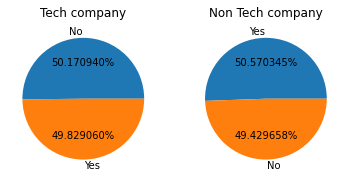

In [381]:
# 3. Does working in a tech company affect adversely to your mental well being?

plt.subplot(1,2,1)
plt.title("Tech company")
plt.pie(data4[data4.tech_company==1]['diagnosed_mental_health_condition'].value_counts(),autopct='%1f%%',radius=1,labels=data4[data4.tech_company==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Non Tech company")
plt.pie(data4[data4.tech_company==0]['diagnosed_mental_health_condition'].value_counts(),autopct='%1f%%',radius=1,labels=data4[data4.tech_company==0]['diagnosed_mental_health_condition'].value_counts().index)

Text(0.5, 1.0, 'Mental health Discussion vs Daignostic Counts')

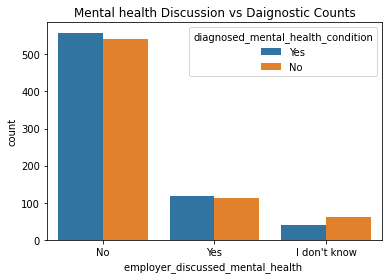

In [382]:
# 4. Does the employers discussion on mental health reduces the chance of getting postive diagonised?

sns.countplot(data=data4,x='employer_discussed_mental_health ',hue='diagnosed_mental_health_condition')
plt.title('Mental health Discussion vs Daignostic Counts')


Text(0.5, 1.0, 'Mental health Resource offering vs Daignostic Counts')

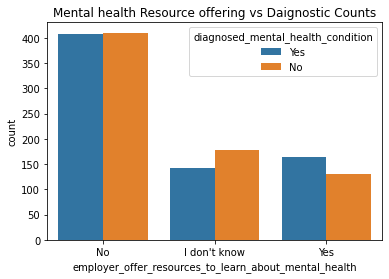

In [383]:
# 5. Will offering more options to learn about mental health reduces the chance of getting positive?

sns.countplot(data=data4,x='employer_offer_resources_to_learn_about_mental_health',hue='diagnosed_mental_health_condition')
plt.title('Mental health Resource offering vs Daignostic Counts')

Text(0.5, 1.0, 'Asking for Leave vs Daignostic Counts')

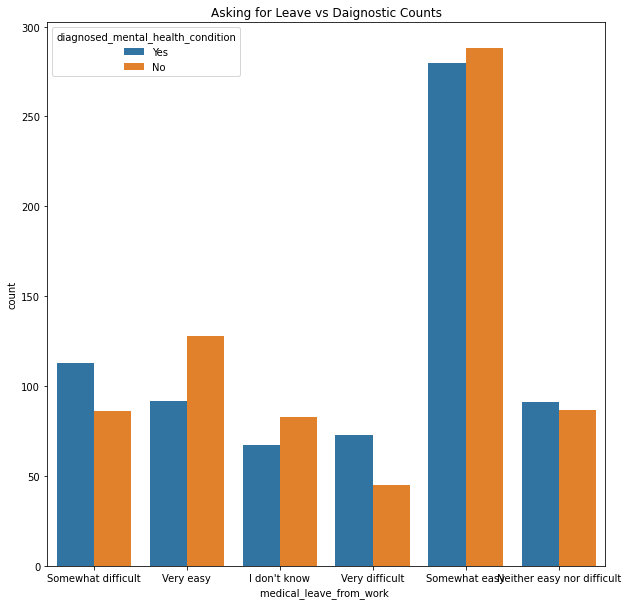

In [384]:
# 6. Does providing no leaves increases the less reporting of mental health issues?

plt.figure(figsize=(10,10))
sns.countplot(data=data4,x='medical_leave_from_work ',hue='diagnosed_mental_health_condition')
plt.title('Asking for Leave vs Daignostic Counts')

Text(0.5, 1.0, 'Discussion with co-workers vs Daignostic Counts')

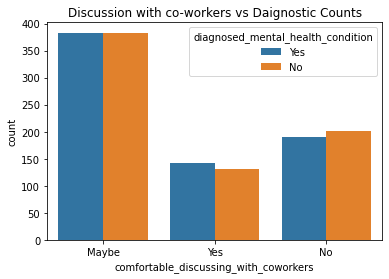

In [385]:
# 7. Does discussion with coworkers about mental health care reduces the chance of positive diagonosis?
sns.countplot(data=data4,x='comfortable_discussing_with_coworkers',hue='diagnosed_mental_health_condition')
plt.title('Discussion with co-workers vs Daignostic Counts')

Text(0.5, 1.0, 'Employers seriousness vs Daignostic Counts')

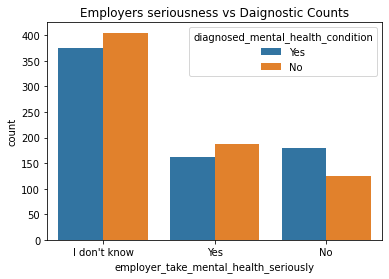

In [386]:
# 8. If Employer takes mental health seriously, then will it reduce the chance of positive diagonosis?
sns.countplot(data=data4,x='employer_take_mental_health_seriously',hue='diagnosed_mental_health_condition')
plt.title('Employers seriousness vs Daignostic Counts')

Text(0.5, 1.0, 'Openess of Family&Friends vs Daignostic Counts')

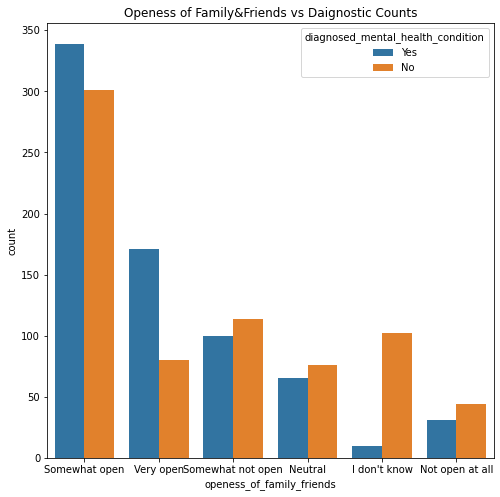

In [387]:
# 9. If family friends are open about the mental health then will it reduce the positive diagonosis?

plt.figure(figsize=(8,8))
sns.countplot(data=data4,x='openess_of_family_friends',hue='diagnosed_mental_health_condition')
plt.title('Openess of Family&Friends vs Daignostic Counts')

Text(0.5, 1.0, 'Family History vs Daignostic Counts')

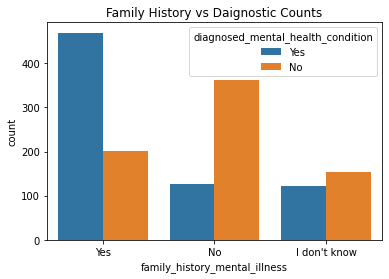

In [388]:
# 10. What are the chances that if a person having family history of mental illness then he is diagonised positive?
sns.countplot(data=data4,x='family_history_mental_illness',hue='diagnosed_mental_health_condition')
plt.title('Family History vs Daignostic Counts')

([<matplotlib.patches.Wedge at 0x7fd81d4ebb10>,
 [Text(-1.0833623634614518, 0.19059378120814285, 'No'),
  Text(1.083362359000282, -0.19059380656606933, 'Yes')],
 [Text(-0.5909249255244282, 0.10396024429535064, '94.456762%'),
  Text(0.5909249230910628, -0.10396025812694691, '5.543237%')])

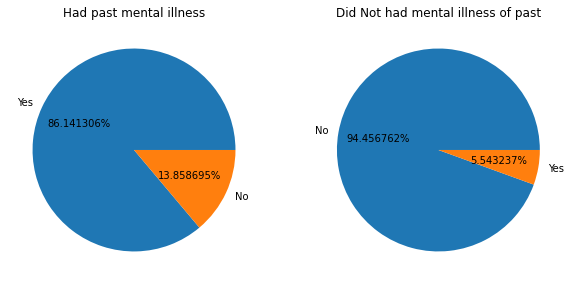

In [389]:
# 11. Does having mental illness of the past affect the diagonosis?

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Had past mental illness")
plt.pie(data4[data4.mental_health_disorder_past=='Yes']['diagnosed_mental_health_condition'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.mental_health_disorder_past=='Yes']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Did Not had mental illness of past")
plt.pie(data4[data4.mental_health_disorder_past=='No']['diagnosed_mental_health_condition'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.mental_health_disorder_past=='No']['diagnosed_mental_health_condition'].value_counts().index)

Text(0.5, 1.0, 'Self proclaimed disorder vs Daignostic Counts')

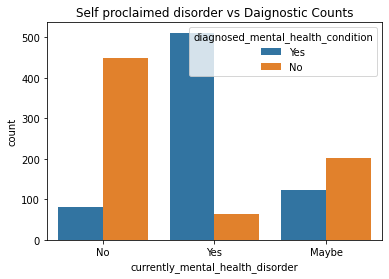

In [390]:
# 12. Is self proclaimed mental health disorders increases the chances of being diagonised positively?
sns.countplot(data=data4,x='currently_mental_health_disorder',hue='diagnosed_mental_health_condition')
plt.title('Self proclaimed disorder vs Daignostic Counts')

([<matplotlib.patches.Wedge at 0x7fd81d3fc810>,
 [Text(-1.0754761146685294, 0.2309786283998678, 'No'),
  Text(1.0754761092620841, -0.23097865357320332, 'Yes')],
 [Text(-0.5866233352737433, 0.12598834276356424, '93.265992%'),
  Text(0.5866233323247732, -0.1259883564944745, '6.734007%')])

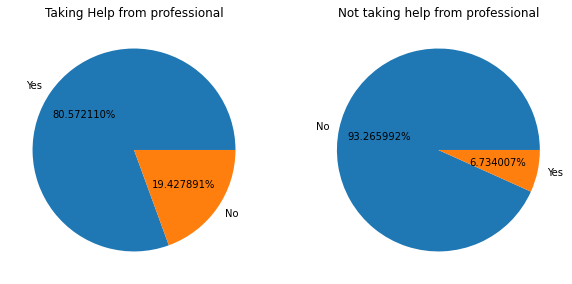

In [391]:
# 13. How many of those who has diagonised positively will seek help of professional?

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Taking Help from professional")
plt.pie(data4[data4.treatment_from_professional==1]['diagnosed_mental_health_condition'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.treatment_from_professional==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Not taking help from professional")
plt.pie(data4[data4.treatment_from_professional==0]['diagnosed_mental_health_condition'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.treatment_from_professional==0]['diagnosed_mental_health_condition'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7fd81d3a3e90>,
 [Text(-0.387286831783129, 1.0295673411328599, 'Often'),
  Text(0.11082048010455826, -1.0944034087983259, 'Sometimes'),
  Text(1.0153415504745185, -0.4231802640483144, 'Rarely'),
  Text(1.0863057567337249, -0.1730312194003421, 'Not applicable to me'),
  Text(1.0997352976415675, -0.02413037756051461, 'Never')],
 [Text(-0.21124736279079762, 0.5615821860724689, '61.452514%'),
  Text(0.06044753460248632, -0.5969473138899958, '30.307263%'),
  Text(0.5538226638951919, -0.2308255985718078, '3.910615%'),
  Text(0.5925304127638499, -0.09438066512745932, '3.631285%'),
  Text(0.5998556168954003, -0.013162024123917057, '0.698324%')])

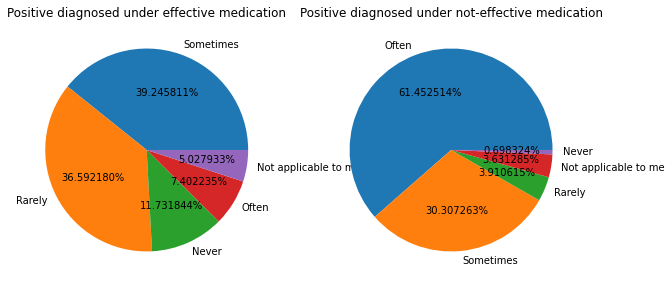

In [392]:
# 14. If one is diagonised positive how effective and not effective medication affecting the individual?

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Positive diagnosed under effective medication")
plt.pie(data4[data4.diagnosed_mental_health_condition=='Yes']['while_effective_treatment_mental_health_issue_interferes_work'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.diagnosed_mental_health_condition=='Yes']['while_effective_treatment_mental_health_issue_interferes_work'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Positive diagnosed under not-effective medication")
plt.pie(data4[data4.diagnosed_mental_health_condition=='Yes']['while_not_effective_treatment_interferes_work '].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.diagnosed_mental_health_condition=='Yes']['while_not_effective_treatment_interferes_work '].value_counts().index)

Text(0.5, 1.0, 'Negetive Diagonosis with age')

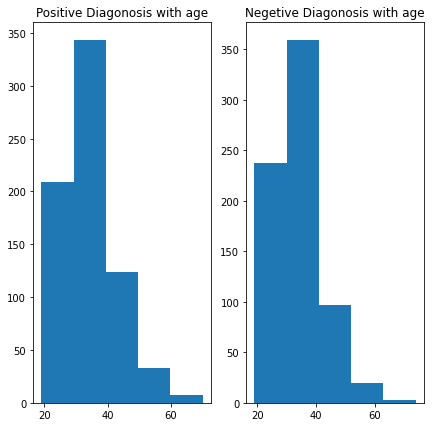

In [393]:
# 15. Is the chances of getting positively diagonised increases with age?

plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.hist(data4[data4.diagnosed_mental_health_condition=='Yes']['age'],bins=5)
plt.title("Positive Diagonosis with age")

plt.subplot(1,2,2)
plt.hist(data4[data4.diagnosed_mental_health_condition=='No']['age'],bins=5)
plt.title("Negetive Diagonosis with age")

([<matplotlib.patches.Wedge at 0x7fd81d183250>,
 [Text(-0.9829959488654123, 0.49367900959448124, 'Yes'),
  Text(0.9829959950869729, -0.4936789175597559, 'No')],
 [Text(-0.536179608472043, 0.2692794597788079, '85.185188%'),
  Text(0.5361796336838033, -0.26927940957804863, '14.814815%')])

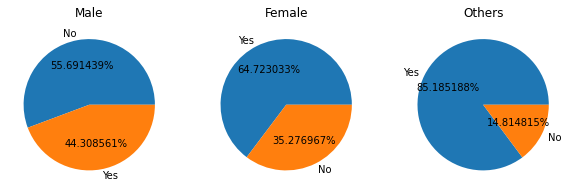

In [394]:
# 16. Is there any chance that a other gender category is more positively diagonised than other gender categories?

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Male")
plt.pie(data4[data4.gender=='male']['diagnosed_mental_health_condition'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.gender=='male']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,2)
plt.title("Female")
plt.pie(data4[data4.gender=='female']['diagnosed_mental_health_condition'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.gender=='female']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,3)
plt.title("Others")
plt.pie(data4[data4.gender=='other']['diagnosed_mental_health_condition'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.gender=='other']['diagnosed_mental_health_condition'].value_counts().index)

In [395]:
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [396]:
# 17. Country wise positive disorder cases?
import chart_studio.plotly as py 
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [397]:
data =dict( type = 'choropleth',
            locations = list(data4[data4.diagnosed_mental_health_condition=='Yes']['country'].value_counts().index),
            locationmode = 'country names',
            colorscale= 'Rainbow',
            z=list(data4[data4.diagnosed_mental_health_condition=='Yes']['country'].value_counts()),
            colorbar = {'title':'Country Colours', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'})
col_map=gobj.Figure(data = [data],layout = layout)
iplot(col_map)

([<matplotlib.patches.Wedge at 0x7fd81d0d8490>,
 [Text(-0.03562008250107137, 1.0994231258813036, 'Yes'),
  Text(0.03562008250107123, -1.0994231258813039, 'No')],
 [Text(-0.01942913590967529, 0.5996853413898019, '51.030928%'),
  Text(0.019429135909675214, -0.599685341389802, '48.969072%')])

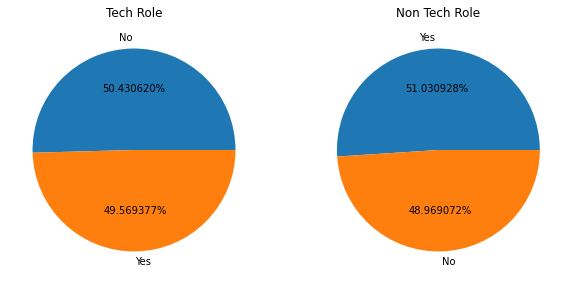

In [398]:
# 18. Does being involved in tech role increases chances of diagonised positive?

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Tech Role")
plt.pie(data4[data4.tech_role==1]['diagnosed_mental_health_condition'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.tech_role==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Non Tech Role")
plt.pie(data4[data4.tech_role==0]['diagnosed_mental_health_condition'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.tech_role==0]['diagnosed_mental_health_condition'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7fd81d00b6d0>,
 [Text(-0.15000672147010105, 1.089723810657449, 'No'),
  Text(0.15000661944279384, -1.089723824702087, 'Yes')],
 [Text(-0.08182184807460056, 0.5943948058131538, '54.354352%'),
  Text(0.08182179242334207, -0.5943948134738656, '45.645645%')])

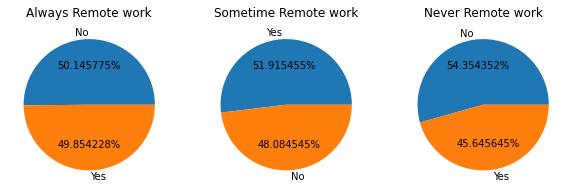

In [399]:
# 19. Will working remotely helps to better the mental health condition? 

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Always Remote work")
plt.pie(data4[data4.work_remotely=='Always']['diagnosed_mental_health_condition'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.work_remotely=='Always']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,2)
plt.title("Sometime Remote work")
plt.pie(data4[data4.work_remotely=='Sometimes']['diagnosed_mental_health_condition'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.work_remotely=='Sometimes']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,3)
plt.title("Never Remote work")
plt.pie(data4[data4.work_remotely=='Never']['diagnosed_mental_health_condition'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.work_remotely=='Never']['diagnosed_mental_health_condition'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7fd81cfa0c90>,
 [Text(-0.06464257105613563, 1.0980989654886542, 'Yes'),
  Text(0.06464257105613574, -1.0980989654886542, 'No')],
 [Text(-0.03525958421243761, 0.5989630720847204, '51.871657%'),
  Text(0.035259584212437675, -0.5989630720847204, '48.128343%')])

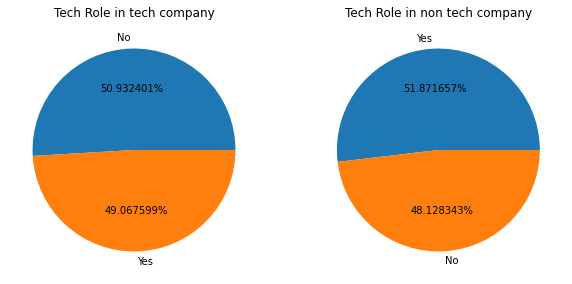

In [400]:
# 20. Does a person in tech role in tech company has higher chance of diagonosis than a tech role in non tech company?

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Tech Role in tech company")
plt.pie(data4[(data4.tech_role==1) & (data4.tech_company==1)]['diagnosed_mental_health_condition'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.tech_role==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Tech Role in non tech company")
plt.pie(data4[(data4.tech_role==1) & (data4.tech_company==0)]['diagnosed_mental_health_condition'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.tech_role==0]['diagnosed_mental_health_condition'].value_counts().index)

**Questions other than Target**

([<matplotlib.patches.Wedge at 0x7fd81cebead0>,
 [Text(-0.030151117190896082, 1.0995866996886334, 'Yes'),
  Text(-0.5050235705581543, -0.9772160422243861, 'No'),
  Text(0.9630061253565793, -0.5316194151135837, 'Maybe')],
 [Text(-0.01644606392230695, 0.5997745634665272, '50.872600%'),
  Text(-0.27546740212262955, -0.5330269321223924, '33.071554%'),
  Text(0.5252760683763159, -0.28997422642559106, '16.055846%')])

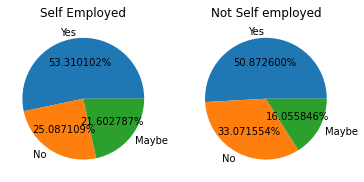

In [401]:
# 1. For self employed does the past mental disorder more than those who are not self employed?

plt.subplot(1,2,1)
plt.title("Self Employed")
plt.pie(data4[data4.self_employed==1]['mental_health_disorder_past'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.self_employed==1]['mental_health_disorder_past'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Not Self employed")
plt.pie(data4[data4.self_employed==0]['mental_health_disorder_past'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.self_employed==0]['mental_health_disorder_past'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7fd81cde70d0>,
 [Text(-0.25106860689769006, 1.0709643106240532, '1'),
  Text(0.2510687071686046, -1.0709642871173088, '0')],
 [Text(-0.1369465128532855, 0.5841623512494835, '57.329845%'),
  Text(0.13694656754651158, -0.584162338427623, '42.670158%')])

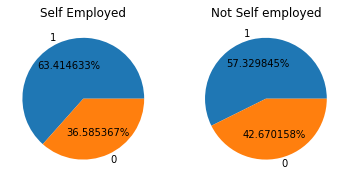

In [402]:
# 2. Does self employed people shy away to seek help?
plt.subplot(1,2,1)
plt.title("Self Employed")
plt.pie(data4[data4.self_employed==1]['treatment_from_professional'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.self_employed==1]['treatment_from_professional'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Not Self employed")
plt.pie(data4[data4.self_employed==0]['treatment_from_professional'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.self_employed==0]['treatment_from_professional'].value_counts().index)

Text(0.5, 1.0, 'Company size vs Health care coverage')

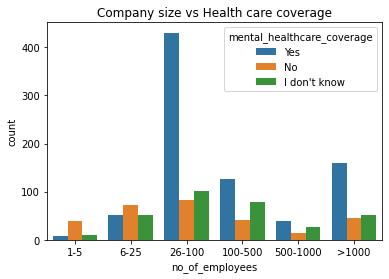

In [403]:
# 3. Is the large company is more serious about mental health than small companies?
sns.countplot(data=data4,x='no_of_employees',hue='mental_healthcare_coverage')
plt.title('Company size vs Health care coverage')

Text(0.5, 1.0, 'Company size vs Openess about mental health')

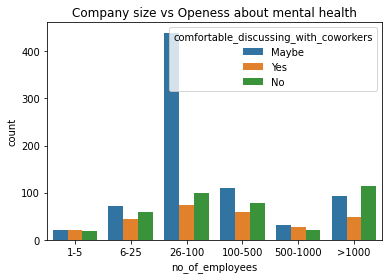

In [404]:
# 4. Does openess about the mental health varies with size of the companies?
sns.countplot(data=data4,x='no_of_employees',hue='comfortable_discussing_with_coworkers')
plt.title('Company size vs Openess about mental health')

([<matplotlib.patches.Wedge at 0x7fd81cc30ad0>,
 [Text(-0.44059807728808054, 1.0079054193177288, 'No'),
  Text(0.1506324301763201, -1.0896374952153474, 'Yes'),
  Text(1.058745387606376, -0.2984262123578033, "I don't know")],
 [Text(-0.24032622397531664, 0.5497665923551248, '63.117874%'),
  Text(0.08216314373253823, -0.5943477246629167, '28.136882%'),
  Text(0.5774974841489323, -0.16277793401334723, '8.745247%')])

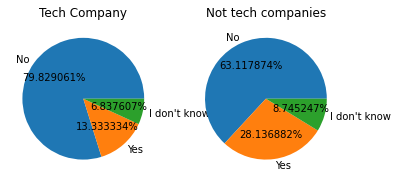

In [405]:
# 5. Does the tech companies take mental health seriously than other non tech companies?
plt.subplot(1,2,1)
plt.title("Tech Company")
plt.pie(data4[data4.tech_company==1]['employer_discussed_mental_health '].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.tech_company==1]['employer_discussed_mental_health '].value_counts().index)

plt.subplot(1,2,2)
plt.title("Not tech companies")
plt.pie(data4[data4.tech_company==0]['employer_discussed_mental_health '].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.tech_company==1]['employer_discussed_mental_health '].value_counts().index)


([<matplotlib.patches.Wedge at 0x7fd81cbd6250>,
 [Text(-0.05834680990910332, 1.0984514781151833, '1'),
  Text(0.058346809909102695, -1.0984514781151833, '0')],
 [Text(-0.03182553267769272, 0.5991553516991909, '51.689190%'),
  Text(0.03182553267769238, -0.5991553516991909, '48.310810%')])

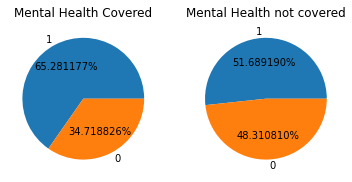

In [406]:
# 6. Does providing more health care benefits provide seeking for professional health?
plt.subplot(1,2,1)
plt.title("Mental Health Covered")
plt.pie(data4[data4.mental_healthcare_coverage=='Yes']['treatment_from_professional'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.mental_healthcare_coverage=='Yes']['treatment_from_professional'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Mental Health not covered")
plt.pie(data4[data4.mental_healthcare_coverage=='No']['treatment_from_professional'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.mental_healthcare_coverage=='No']['treatment_from_professional'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7fd81caf1350>,
 [Text(-0.2840207786894458, 1.062700426871393, '1'),
  Text(0.2840207786894455, -1.062700426871393, '0')],
 [Text(-0.1549204247396977, 0.579654778293487, '58.312958%'),
  Text(0.1549204247396975, -0.5796547782934871, '41.687042%')])

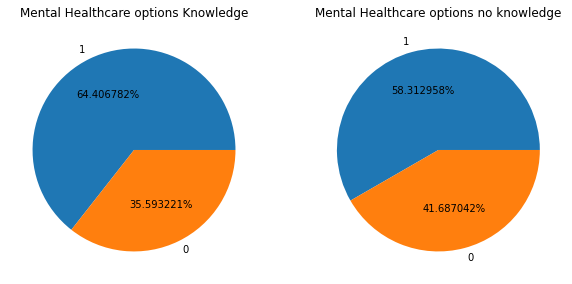

In [407]:
# 7. Does providing more information about mental health increase help seeking behaviour?
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Mental Healthcare options Knowledge")
plt.pie(data4[data4.employer_offer_resources_to_learn_about_mental_health=='Yes']['treatment_from_professional'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.employer_offer_resources_to_learn_about_mental_health=='Yes']['treatment_from_professional'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Mental Healthcare options no knowledge")
plt.pie(data4[data4.employer_offer_resources_to_learn_about_mental_health=='No']['treatment_from_professional'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.employer_offer_resources_to_learn_about_mental_health=='No']['treatment_from_professional'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7fd81d7b9610>,
 [Text(0.21807097813164583, 1.078167449191779, 'Somewhat open'),
  Text(-1.09854150500076, -0.05662651137643169, 'Very open'),
  Text(-0.6373633449424054, -0.8965310739309755, "I don't know"),
  Text(0.266419245583799, -1.0672491675248847, 'Somewhat not open'),
  Text(0.9165788254046539, -0.6081802831560928, 'Neutral'),
  Text(1.0908949119861056, -0.14123841900427447, 'Not open at all')],
 [Text(0.11894780625362497, 0.5880913359227885, '43.647540%'),
  Text(-0.5992044572731418, -0.03088718802350819, '14.344262%'),
  Text(-0.3476527336049484, -0.48901694941689566, '14.344262%'),
  Text(0.14531958850025398, -0.582135909559028, '13.114753%'),
  Text(0.4999520865843566, -0.3317346999033233, '10.450820%'),
  Text(0.5950335883560576, -0.07703913763869516, '4.098361%')])

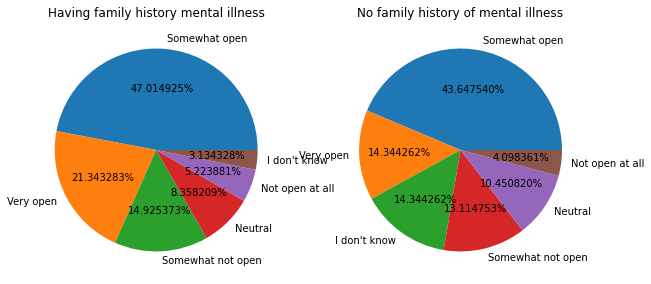

In [408]:
# 8. The family where there are history mental health isssues are they open about discussing among family?
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Having family history mental illness")
plt.pie(data4[data4.family_history_mental_illness=='Yes']['openess_of_family_friends'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.family_history_mental_illness=='Yes']['openess_of_family_friends'].value_counts().index)

plt.subplot(1,2,2)
plt.title("No family history of mental illness")
plt.pie(data4[data4.family_history_mental_illness=='No']['openess_of_family_friends'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.family_history_mental_illness=='No']['openess_of_family_friends'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7fd81ca1e190>,
 [Text(-0.02303663990543217, 1.0997587522824575, '0'),
  Text(0.02303663990543179, -1.0997587522824575, '1')],
 [Text(-0.012565439948417547, 0.5998684103358859, '50.666666%'),
  Text(0.012565439948417339, -0.5998684103358859, '49.333334%')])

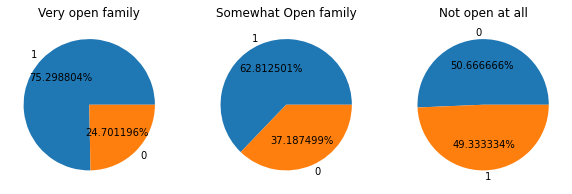

In [409]:
# 9. Does willing ness among family memebers increases the chance of seeking more professional help?

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Very open family")
plt.pie(data4[data4.openess_of_family_friends=='Very open']['treatment_from_professional'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.openess_of_family_friends=='Very open']['treatment_from_professional'].value_counts().index)

plt.subplot(1,3,2)
plt.title("Somewhat Open family")
plt.pie(data4[data4.openess_of_family_friends=='Somewhat open']['treatment_from_professional'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.openess_of_family_friends=='Somewhat open']['treatment_from_professional'].value_counts().index)

plt.subplot(1,3,3)
plt.title("Not open at all")
plt.pie(data4[data4.openess_of_family_friends=='Not open at all']['treatment_from_professional'].value_counts(), autopct='%1f%%',radius=1, labels=data4[data4.openess_of_family_friends=='Not open at all']['treatment_from_professional'].value_counts().index)

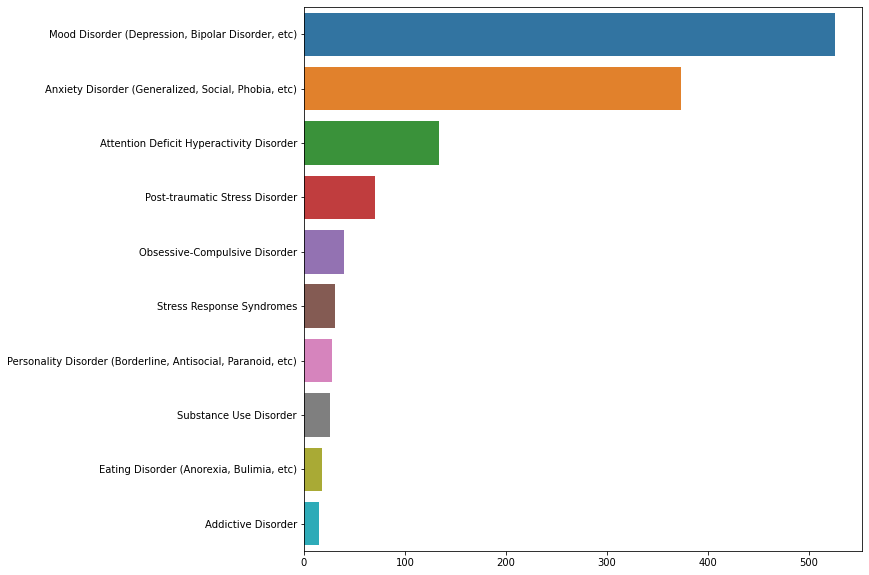

In [410]:
# 10. Which kind of discorder occur most?
disorder_type=pd.DataFrame(data4[data4.type_of_disorder.isnull() != True]['type_of_disorder'].str.split("|").tolist()).stack()
plt.figure(figsize=(10,10))
sns.barplot(x=disorder_type.value_counts()[0:10],y=disorder_type.value_counts().index[0:10])

> # **4. ML Models**

**Target Variable Column:** "diagnosed_mental_health_condition"

**Aim :** Here our main task is that knowing certain paramerters of the repondent's background we have to predict if one will be diagnosed positive or negetive.

> ### **Stop Data Leakage:** 

  * So, now comes the important part where we have to stop data leakage. To stop Data leakage we have to drop certain columns which we can't have while making prediction. Like Treatment from professional column we might not know when we are making prediction because if one is diagnosed then one takes help from professional. These type of columns are like false target if we include it might train on that and then make prediction.

> **Stop Train and Test contamination :**

*  To stop this issue we have split the data then done all the preprocessing seperately.

In [411]:
print(data4.shape)

(1433, 27)


In [412]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 27 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   self_employed                                                  1433 non-null   object
 1   no_of_employees                                                1433 non-null   object
 2   tech_company                                                   1433 non-null   object
 3   mental_healthcare_coverage                                     1433 non-null   object
 4   knowledge_about_mental_healthcare_options_workplace            1433 non-null   object
 5   employer_discussed_mental_health                               1433 non-null   object
 6   employer_offer_resources_to_learn_about_mental_health          1433 non-null   object
 7   medical_leave_from_work                                        1433 n

> # **Data Preperation**

In [413]:
data4.shape

(1433, 27)

In [414]:
# Here We Dropping unnecessary columns
y=data4.diagnosed_mental_health_condition
x=data4.drop(['diagnosed_mental_health_condition','treatment_from_professional','while_effective_treatment_mental_health_issue_interferes_work','while_not_effective_treatment_interferes_work ','type_of_disorder','US state','US state work'],axis=1)

In [415]:
print(x.shape)
print(y.shape)

(1433, 20)
(1433,)


In [416]:
# Splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1146, 20)
(287, 20)
(1146,)
(287,)


In [417]:
cat_columns=['self_employed', 
             'no_of_employees', 
             'tech_company',
             'mental_healthcare_coverage',
             'knowledge_about_mental_healthcare_options_workplace',
             'employer_discussed_mental_health ',
             'employer_offer_resources_to_learn_about_mental_health',
             'medical_leave_from_work ',  
             'comfortable_discussing_with_coworkers',
             'employer_take_mental_health_seriously', 
             'openess_of_family_friends',
             'family_history_mental_illness', 
             'mental_health_disorder_past',
             'currently_mental_health_disorder', 
             'age', 
             'gender', 
             'country',
             'country work ', 
             'work_remotely', 
             'tech_role']

In [418]:
 print(data4['diagnosed_mental_health_condition'].unique())

['Yes' 'No']


In [419]:
for col in cat_columns:
  print('The Unique value',col,'is')
  print(data4[col].unique())
  print()

The Unique value self_employed is
[0 1]

The Unique value no_of_employees is
['1-5' '6-25' '26-100' '100-500' '500-1000' '>1000']

The Unique value tech_company is
[1.0 0.0]

The Unique value mental_healthcare_coverage is
['Yes' 'No' "I don't know"]

The Unique value knowledge_about_mental_healthcare_options_workplace is
['Yes' 'No' 'I am not sure']

The Unique value employer_discussed_mental_health  is
['No' 'Yes' "I don't know"]

The Unique value employer_offer_resources_to_learn_about_mental_health is
['No' "I don't know" 'Yes']

The Unique value medical_leave_from_work  is
['Somewhat difficult' 'Very easy' "I don't know" 'Very difficult'
 'Somewhat easy' 'Neither easy nor difficult']

The Unique value comfortable_discussing_with_coworkers is
['Maybe' 'Yes' 'No']

The Unique value employer_take_mental_health_seriously is
["I don't know" 'Yes' 'No']

The Unique value openess_of_family_friends is
['Somewhat open' 'Very open' 'Somewhat not open' 'Neutral' "I don't know"
 'Not open at a

In [420]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [421]:
label_encode=LabelEncoderExt()

label_x_train=x_train.copy()
label_x_test=x_test.copy()

for col in cat_columns:
    label_x_train[col]=label_encode.fit(x_train[col])
    label_encode.classes_
    label_x_train[col]=label_encode.transform(x_train[col])
    label_x_test[col] = label_encode.transform(label_x_test[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [422]:
label_x_train

,self_employed,no_of_employees,tech_company,mental_healthcare_coverage,knowledge_about_mental_healthcare_options_workplace,employer_discussed_mental_health,employer_offer_resources_to_learn_about_mental_health,medical_leave_from_work,comfortable_discussing_with_coworkers,employer_take_mental_health_seriously,openess_of_family_friends,family_history_mental_illness,mental_health_disorder_past,currently_mental_health_disorder,age,gender,country,country work,work_remotely,tech_role
867,2,3,2,1,1,0,0,5,1,1,1,1,0,1,48,2,43,42,1,2
608,2,2,2,3,0,1,0,0,0,0,0,3,1,1,48,2,10,9,0,2
511,2,1,2,3,0,3,0,3,1,1,0,1,1,1,48,2,10,9,2,2
1214,2,2,2,3,1,1,1,3,0,0,4,3,3,3,48,2,49,48,0,2
1244,2,2,2,3,1,1,1,3,0,0,4,3,3,3,48,2,49,48,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2,2,2,0,1,1,0,0,1,0,6,3,0,0,48,2,49,48,0,2
835,2,3,2,3,3,1,0,1,0,0,3,3,0,0,48,1,49,48,2,2
1216,2,2,2,3,1,1,1,3,0,0,6,0,1,1,48,2,10,48,2,2
559,2,2,2,1,0,1,0,5,0,0,1,0,3,3,48,2,49,48,2,2


In [423]:
label_x_test

,self_employed,no_of_employees,tech_company,mental_healthcare_coverage,knowledge_about_mental_healthcare_options_workplace,employer_discussed_mental_health,employer_offer_resources_to_learn_about_mental_health,medical_leave_from_work,comfortable_discussing_with_coworkers,employer_take_mental_health_seriously,openess_of_family_friends,family_history_mental_illness,mental_health_disorder_past,currently_mental_health_disorder,age,gender,country,country work,work_remotely,tech_role
1059,2,5,2,3,0,1,0,5,0,1,3,3,1,3,48,2,49,48,0,2
411,2,1,2,3,0,1,1,1,1,0,6,3,3,3,48,2,49,48,0,2
342,2,1,2,3,1,3,3,0,3,3,6,3,3,3,48,1,49,48,2,2
1295,2,2,2,3,1,1,1,3,0,0,6,3,0,0,48,2,48,47,0,2
483,2,1,2,3,3,1,1,3,0,0,6,3,3,3,48,3,49,48,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2,5,2,3,3,0,0,1,0,1,4,1,1,1,48,2,49,48,0,2
1309,2,2,2,3,1,1,1,3,0,0,4,3,3,3,48,1,49,48,2,2
520,2,2,2,0,1,1,1,5,3,1,4,3,3,3,48,1,49,48,2,2
993,2,5,2,3,3,0,0,1,3,3,6,3,3,1,48,2,49,48,0,2


In [424]:
df = pd.DataFrame(label_x_test)

for col in cat_columns:
  print('The Unique value',col,'is')
  print(df[col].unique())
  #print(type(df["Subjects"].unique()))

type(label_x_test)

The Unique value self_employed is
[2]
The Unique value no_of_employees is
[5 1 2 0 3 4]
The Unique value tech_company is
[2]
The Unique value mental_healthcare_coverage is
[3 0 1]
The Unique value knowledge_about_mental_healthcare_options_workplace is
[0 1 3]
The Unique value employer_discussed_mental_health  is
[1 3 0]
The Unique value employer_offer_resources_to_learn_about_mental_health is
[0 1 3]
The Unique value medical_leave_from_work  is
[5 1 0 3 6 2]
The Unique value comfortable_discussing_with_coworkers is
[0 1 3]
The Unique value employer_take_mental_health_seriously is
[1 0 3]
The Unique value openess_of_family_friends is
[3 6 1 4 0 2]
The Unique value family_history_mental_illness is
[3 1 0]
The Unique value mental_health_disorder_past is
[1 3 0]
The Unique value currently_mental_health_disorder is
[3 0 1]
The Unique value age is
[48]
The Unique value gender is
[2 1 3]
The Unique value country is
[49 48 33 31 44 21 45  7 40 10 15 50  2 25 11 28 37  3 18 27 46 19 20 30
 32]


pandas.core.frame.DataFrame

In [425]:
# For Y label Encode
label_encode_1=LabelEncoder()
label_y_train_1=label_encode_1.fit_transform(y_train)
label_y_test_1=label_encode_1.transform(y_test)

In [426]:
st=pd.DataFrame(label_y_train_1)
print(st)

      0
0     0
1     0
2     0
3     1
4     1
...  ..
1141  0
1142  1
1143  0
1144  1
1145  0

[1146 rows x 1 columns]


In [427]:
st=pd.DataFrame(label_y_test_1)
print(st)

     0
0    1
1    1
2    1
3    0
4    1
..  ..
282  0
283  1
284  1
285  1
286  1

[287 rows x 1 columns]


> # **1. Logistic Regression** 

In [428]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic=LogisticRegression(C=1,penalty='l1',solver='liblinear',random_state=0)

logistic.fit(label_x_train,label_y_train_1)
preds3=logistic.predict(label_x_test)
accuracy_score(label_y_test_1,preds3)

0.89198606271777

In [430]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

results = confusion_matrix(label_y_test_1,preds3)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(label_y_test_1,preds3))
print ('Classification Report : ')
print (classification_report(label_y_test_1,preds3))
print('AUC-ROC:',roc_auc_score(label_y_test_1,preds3))
print('LOGLOSS Value is',log_loss(label_y_test_1,preds3))

Confusion Matrix :
[[127  13]
 [ 18 129]]
Accuracy Score is 0.89198606271777
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       140
           1       0.91      0.88      0.89       147

    accuracy                           0.89       287
   macro avg       0.89      0.89      0.89       287
weighted avg       0.89      0.89      0.89       287

AUC-ROC: 0.8923469387755102
LOGLOSS Value is 3.730705446023776


> # **2. Decision Tree** 

In [431]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(label_x_train,label_y_train_1)
y_pred = clf.predict(label_x_test)
accuracy_score(label_y_test_1,y_pred)

0.7909407665505227

In [432]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

results = confusion_matrix(label_y_test_1,y_pred)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(label_y_test_1,y_pred))
print ('Classification Report : ')
print (classification_report(label_y_test_1,y_pred))
print('AUC-ROC:',roc_auc_score(label_y_test_1,y_pred))
print('LOGLOSS Value is',log_loss(label_y_test_1,y_pred))

Confusion Matrix :
[[111  29]
 [ 31 116]]
Accuracy Score is 0.7909407665505227
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       140
           1       0.80      0.79      0.79       147

    accuracy                           0.79       287
   macro avg       0.79      0.79      0.79       287
weighted avg       0.79      0.79      0.79       287

AUC-ROC: 0.7909863945578232
LOGLOSS Value is 7.220730912962079


> # **3. Random Forest** 

In [433]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model.fit(label_x_train,label_y_train_1)
preds=model.predict(label_x_test)
accuracy_score(label_y_test_1,preds)

0.9337979094076655

In [434]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

results = confusion_matrix(label_y_test_1,preds)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(label_y_test_1,preds))
print ('Classification Report : ')
print (classification_report(label_y_test_1,preds))
print('AUC-ROC:',roc_auc_score(label_y_test_1,preds))
print('LOGLOSS Value is',log_loss(label_y_test_1,preds))

Confusion Matrix :
[[126  14]
 [  5 142]]
Accuracy Score is 0.9337979094076655
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       140
           1       0.91      0.97      0.94       147

    accuracy                           0.93       287
   macro avg       0.94      0.93      0.93       287
weighted avg       0.94      0.93      0.93       287

AUC-ROC: 0.9329931972789115
LOGLOSS Value is 2.2865782085969544


> # **4. KNN** 

In [435]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(label_x_train)
label_x_train = scaler.transform(label_x_train) 
label_x_test = scaler.transform(label_x_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(label_x_train, label_y_train_1) 

KNeighborsClassifier(n_neighbors=8)

In [437]:
y_pred1 = classifier.predict(label_x_test)

In [438]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

results = confusion_matrix(label_y_test_1,y_pred1)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(label_y_test_1,y_pred1))
print ('Classification Report : ')
print (classification_report(label_y_test_1,y_pred1))
print('AUC-ROC:',roc_auc_score(label_y_test_1,y_pred1))
print('LOGLOSS Value is',log_loss(label_y_test_1,y_pred1))

Confusion Matrix :
[[129  11]
 [ 30 117]]
Accuracy Score is 0.8571428571428571
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       140
           1       0.91      0.80      0.85       147

    accuracy                           0.86       287
   macro avg       0.86      0.86      0.86       287
weighted avg       0.86      0.86      0.86       287

AUC-ROC: 0.8586734693877552
LOGLOSS Value is 4.9341415601500715
